## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.
> If it's exactly in between two options, select the higher value.


### Dataset

In this homework, we continue using the fuel efficiency dataset.
Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

You can do it with wget:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
```

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

### Preparing the dataset 

Preparation:

* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

%matplotlib inline

In [2]:
#data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
data = 'car_fuel_efficiency.csv'

In [3]:
#!wget $data

In [4]:
df = pd.read_csv(data)
#df = pd.read_csv('car_fuel_efficiency.csv')

In [5]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [6]:
len(df)

9704

In [7]:
df.dtypes[df.dtypes=='object'],df.dtypes[df.dtypes=='int64'], df.dtypes[df.dtypes=='float64']

(origin        object
 fuel_type     object
 drivetrain    object
 dtype: object,
 engine_displacement    int64
 model_year             int64
 dtype: object,
 num_cylinders          float64
 horsepower             float64
 vehicle_weight         float64
 acceleration           float64
 num_doors              float64
 fuel_efficiency_mpg    float64
 dtype: object)

In [8]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [9]:
df.nunique()

engine_displacement      36
num_cylinders            14
horsepower              192
vehicle_weight         9704
acceleration            162
model_year               24
origin                    3
fuel_type                 2
drivetrain                2
num_doors                 9
fuel_efficiency_mpg    9704
dtype: int64

In [10]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [11]:
df.isnull().any().sum()

np.int64(4)

In [12]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_full_train = df_full_train.fuel_efficiency_mpg.values
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_full_train['fuel_efficiency_mpg']
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

len(df), len(df_full_train), len(df_train), len(df_val), len(df_test)

(9704, 7763, 5822, 1941, 1941)

In [13]:
# Define numerical and categorical features
numerical = ['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight', 
            'acceleration', 'model_year']
categorical = ['origin', 'fuel_type', 'drivetrain', 'num_doors']

In [14]:
df[numerical].isnull().sum(), df[categorical].isnull().sum(), df['fuel_efficiency_mpg'].isnull().sum()

(engine_displacement      0
 num_cylinders          482
 horsepower             708
 vehicle_weight           0
 acceleration           930
 model_year               0
 dtype: int64,
 origin          0
 fuel_type       0
 drivetrain      0
 num_doors     502
 dtype: int64,
 np.int64(0))

In [15]:
df_train[numerical]  = df_train[numerical].fillna(0).values
df_train[categorical] = df_train[categorical].fillna('NA').values

df_val[numerical]  = df_val[numerical].fillna(0).values
df_val[categorical] = df_val[categorical].fillna('NA').values   

df_test[numerical]  = df_test[numerical].fillna(0).values
df_test[categorical] = df_test[categorical].fillna('NA').values

df_full_train[numerical]  = df_full_train[numerical].fillna(0).values
df_full_train[categorical] = df_full_train[categorical].fillna('NA').values

## Question 1

Let's train a decision tree regressor to predict the `fuel_efficiency_mpg` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?


* `'vehicle_weight'`
* `'model_year'`
* `'origin'`
* `'fuel_type'`

In [16]:
# Create training dictionaries
dv = DictVectorizer(sparse=True)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

# Train a decision tree regressor
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

# Make predictions
y_pred_train = dt.predict(X_train)
y_pred_val = dt.predict(X_val)

# Calculate RMSE for training and validation sets
rmse_train = root_mean_squared_error(y_train, y_pred_train)
rmse_val = root_mean_squared_error(y_val, y_pred_val)

print(f'Train RMSE: {rmse_train:.2f}')
print(f'Val RMSE: {rmse_val:.2f}')

# Print the tree structure
print('\nDecision Tree Structure:')
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

Train RMSE: 1.59
Val RMSE: 1.61

Decision Tree Structure:
|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



- Q1 - Response
- Which feature is used for splitting the data?


* `'vehicle_weight'`

## Question 2

Train a random forest regressor with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on the validation data?

* 0.045
* 0.45
* 4.5
* 45.0

In [17]:

rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
print(f'Val RMSE: {rmse:.6f}')

Val RMSE: 0.460908


## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200

If it doesn't stop improving, use the latest iteration number in
your answer.


n_estimators=10, RMSE=0.460908
n_estimators=20, RMSE=0.454123
n_estimators=30, RMSE=0.451700
n_estimators=40, RMSE=0.449141
n_estimators=50, RMSE=0.446955
n_estimators=60, RMSE=0.446059
n_estimators=70, RMSE=0.445436
n_estimators=80, RMSE=0.445666
n_estimators=90, RMSE=0.445184
n_estimators=100, RMSE=0.444820
n_estimators=110, RMSE=0.444041
n_estimators=120, RMSE=0.444558
n_estimators=130, RMSE=0.444117
n_estimators=140, RMSE=0.444003
n_estimators=150, RMSE=0.443608
n_estimators=160, RMSE=0.443315
n_estimators=170, RMSE=0.443339
n_estimators=180, RMSE=0.442812
n_estimators=190, RMSE=0.443047
n_estimators=200, RMSE=0.443045

RMSE stops improving after n_estimators = 90


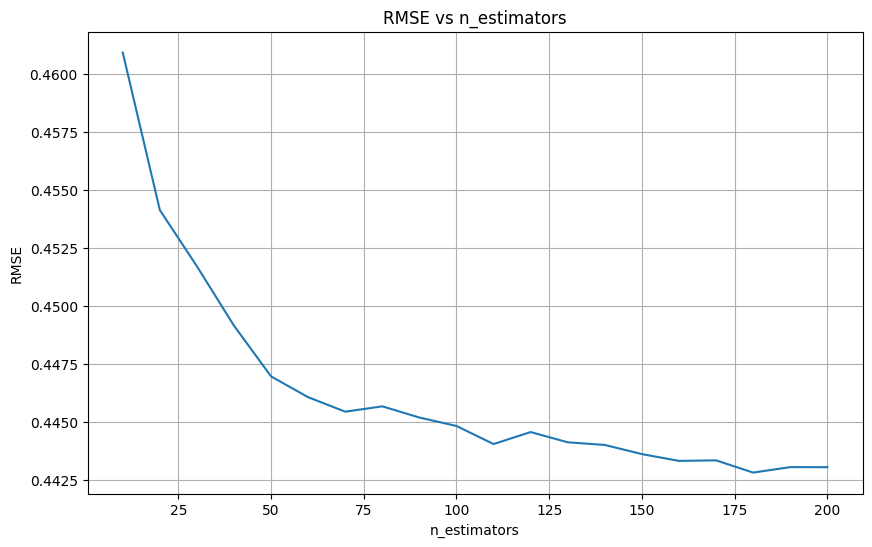

In [18]:

n_estimators_values = range(10, 210, 10)
rmse_scores = []

for n_est in n_estimators_values:
    # Train model
    rf = RandomForestRegressor(n_estimators=n_est, random_state=1)
    rf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf.predict(X_val)
    
    # Calculate RMSE
    rmse = root_mean_squared_error(y_val, y_pred)
    rmse_scores.append(rmse)
    
    print(f'n_estimators={n_est}, RMSE={rmse:.6f}')

# Find where RMSE stops improving (up to 3 decimal places)
rmse_rounded = np.round(rmse_scores, 3)
for i in range(1, len(rmse_rounded)):
    if rmse_rounded[i] == rmse_rounded[i-1]:
        print(f'\nRMSE stops improving after n_estimators = {n_estimators_values[i-1]}')
        break

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, rmse_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs n_estimators')
plt.grid(True)




## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25

max_depth=10, mean RMSE=0.442380
max_depth=15, mean RMSE=0.445299
max_depth=20, mean RMSE=0.445971
max_depth=25, mean RMSE=0.446444


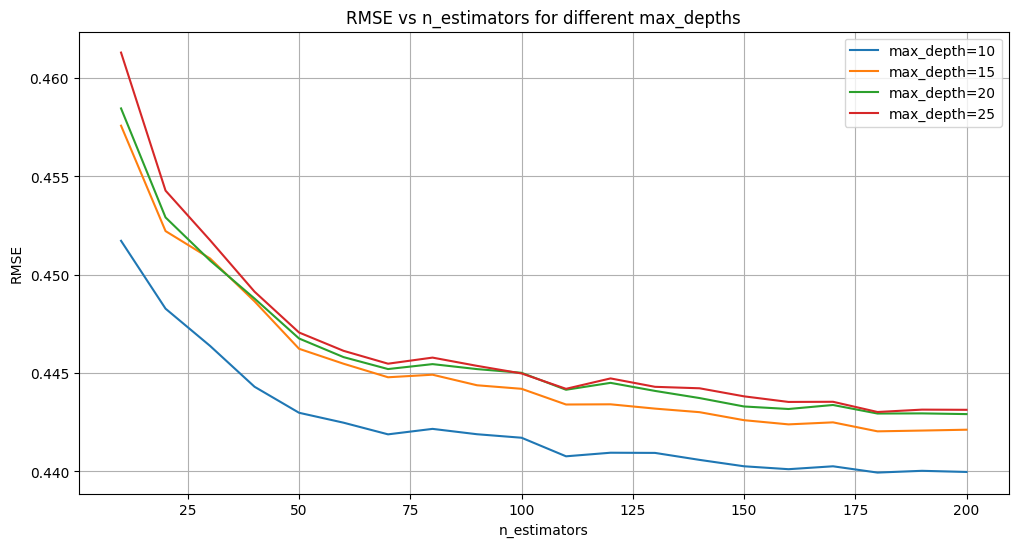

In [19]:
# Define parameters
max_depths = [10, 15, 20, 25]
n_estimators_range = range(10, 210, 10)

# Dictionary to store results
results = {depth: [] for depth in max_depths}

# Train and evaluate models
for depth in max_depths:
    for n_est in n_estimators_range:
        # Train model
        rf = RandomForestRegressor(
            max_depth=depth,
            n_estimators=n_est,
            random_state=1
        )
        rf.fit(X_train, y_train)
        
        # Make predictions and calculate RMSE
        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        results[depth].append(rmse)
    
    print(f'max_depth={depth}, mean RMSE={np.mean(results[depth]):.6f}')

# Plot results
plt.figure(figsize=(12, 6))
for depth in max_depths:
    plt.plot(n_estimators_range, results[depth], label=f'max_depth={depth}')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs n_estimators for different max_depths')
plt.legend()
plt.grid(True)

# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `vehicle_weight`
*	`horsepower`
* `acceleration`
* `engine_displacement`	

In [20]:
# Train the specified random forest and show feature importances
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

feature_names = dv.get_feature_names_out()
importances = rf.feature_importances_

fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Print top features
print("Top 20 features by importance:")
print(fi.head(20))

# Print importances for the requested numeric features
candidates = ['vehicle_weight', 'horsepower', 'acceleration', 'engine_displacement']
print("\nImportances for selected features:")
for f in candidates:
    print(f"{f}: {fi.get(f, 0.0):.6f}")

# Which of the four is most important
best = max(candidates, key=lambda x: fi.get(x, 0.0))
print(f"\nMost important among the four: {best}")

Top 20 features by importance:
vehicle_weight                  0.959141
horsepower                      0.015962
acceleration                    0.011371
engine_displacement             0.003220
model_year                      0.003199
num_cylinders                   0.002320
num_doors                       0.001580
origin=USA                      0.000523
origin=Europe                   0.000509
origin=Asia                     0.000469
drivetrain=All-wheel drive      0.000396
fuel_type=Gasoline              0.000362
fuel_type=Diesel                0.000334
num_doors=NA                    0.000314
drivetrain=Front-wheel drive    0.000299
dtype: float64

Importances for selected features:
vehicle_weight: 0.959141
horsepower: 0.015962
acceleration: 0.011371
engine_displacement: 0.003220

Most important among the four: vehicle_weight


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value


In [23]:
%pip install xgboost
import xgboost as xgb

# Create DMatrix for train and validation
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Create watchlist
watchlist = [(dtrain, 'train'), (dval, 'val')]

# Train with eta = 0.3
xgb_params_03 = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model_03 = xgb.train(
    xgb_params_03,
    dtrain,
    num_boost_round=100,
    evals=watchlist
)

# Train with eta = 0.1
xgb_params_01 = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model_01 = xgb.train(
    xgb_params_01,
    dtrain,
    num_boost_round=100,
    evals=watchlist
)

# Get final RMSE for both models
rmse_03 = model_03.eval(dval).split()[1].split(':')[1]
rmse_01 = model_01.eval(dval).split()[1].split(':')[1]

print(f'\nFinal RMSE (eta=0.3): {rmse_03}')
print(f'Final RMSE (eta=0.1): {rmse_01}')


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\aYo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 2.8 MB/s eta 0:00:26
   - -------------------------------------- 2.4/72.0 MB 7.9 MB/s eta 0:00:09
   -- ------------------------------------- 4.5/72.0 MB 8.1 MB/s eta 0:00:09
   --- ------------------------------------ 6.3/72.0 MB 8.4 MB/s eta 0:00:08
   ---- ----------------------------------- 8.1/72.0 MB 8.2 MB/s eta 0:00:08
   ----- ---------------------------------- 9.4/72.0 MB 8.0 MB/s eta 0:00:08
   ----- ---------------------------------- 10.7/72.0 MB 7.6 MB/s eta 0:00:09
   ------ --------------------------------- 11.5/72.0 MB 7.4 MB/s eta 0:00:09
   ------ --------------------------------- 12.6/72.0 MB 6.8 MB/s eta 0:00:09
   ------- -------------------------------- 13.1/72.0 MB 6.6 MB/s eta 0:00:09
   ------- -------------------------------- 13.9/72.0 MB 6.1 MB/s eta 0:00:10
